In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('combine_rating_all_vehicle.csv')
df.head()

,Rating,Model Name,Type
0,1.0,TVS iQube,2-wheeler
1,1.0,TVS iQube,2-wheeler
2,3.0,TVS iQube,2-wheeler
3,1.0,TVS iQube,2-wheeler
4,1.0,TVS iQube,2-wheeler


In [3]:
labels = ['4-wheeler','2-wheeler']
sizes = [df.query('Type == "4-wheeler"').Type.count(),df.query('Type == "2-wheeler"').Type.count()]
print(sizes)

[269, 844]


In [5]:
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, hole=.5)])
fig.update_layout(title_text='Wheelers Type')
fig.show(renderer="svg")

NameError: name 'go' is not defined

In [6]:
present_evs_in_india = df['Model Name'].value_counts()
print(present_evs_in_india)

Hero Electric Flash        102
Okinawa Praise              95
Hero Electric Optima        82
tata nexon ev               75
Tata Nexon EV               74
hyundai kona                56
Revolt RV 400               52
PURE EV EPluto 7G           50
Tork Kratos                 38
Hero Electric Photon        38
Ather 450X                  30
OLA S1                      29
Ampere Magnus EX            28
OLA S1 Pro                  28
Ampere REO                  24
Benling Aura                22
Ampere Magnus Pro           22
tata tigor ev               20
PURE EV ETrance Neo         19
TVS iQube                   17
Bajaj Chetak                15
Okinawa Ridge Plus          15
Tata Tigor EV               15
Ampere Zeal                 13
MG ZS EV                    12
Kia EV6                     12
Bounce Infinity E1          12
Okinawa i-Praise            11
Revolt RV 300               10
Techo Electra Emerge        10
Hero Electric Optima CX      9
Techo Electra Raptor         9
Hero Ele

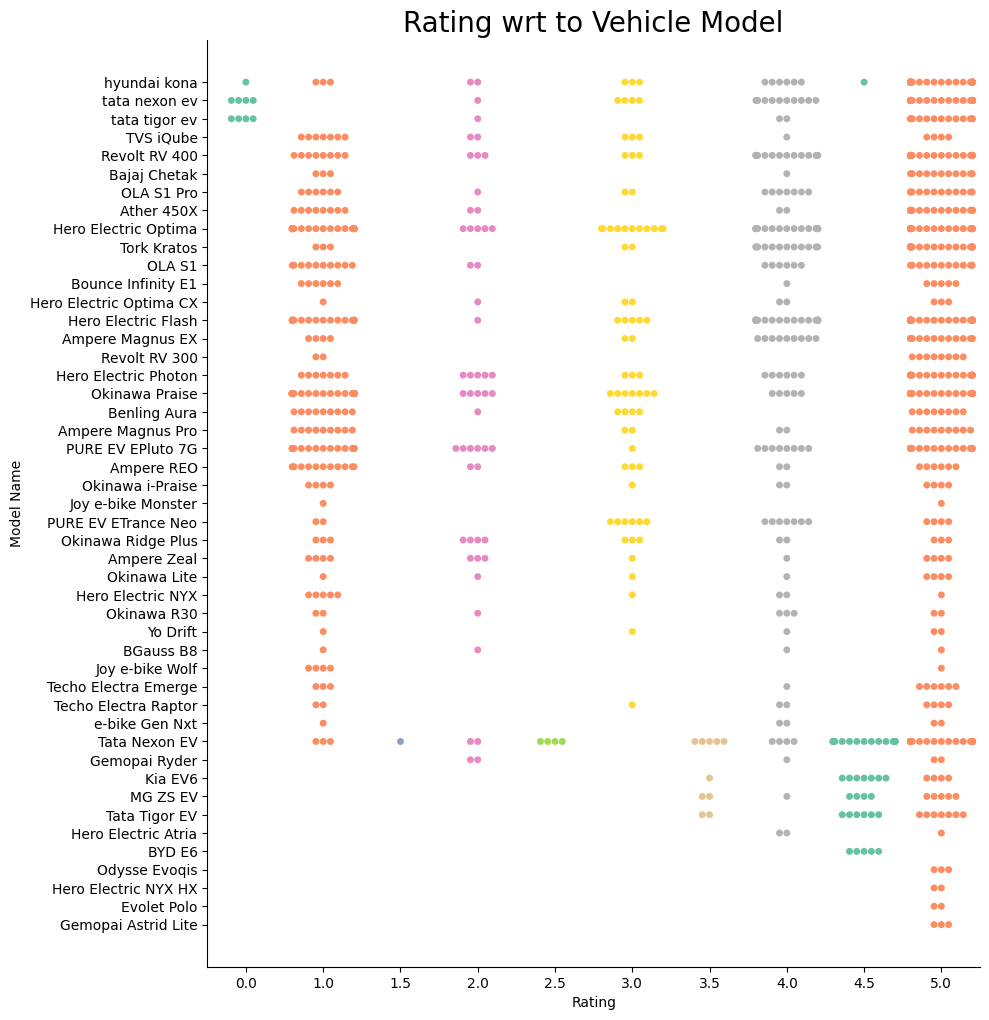

In [7]:
sns.catplot(x="Rating", y="Model Name",data=df, 
            orient="v", height=10,palette="Set2",kind="swarm")
plt.title('Rating wrt to Vehicle Model',fontsize = 20)
plt.show()

In [8]:
charging_station = pd.read_excel("charging_station.xlsx")
charging_station.head()

,State/ UTs,No. of charging stations
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,281
3,Gujarat,278
4,Uttar Pradesh,207


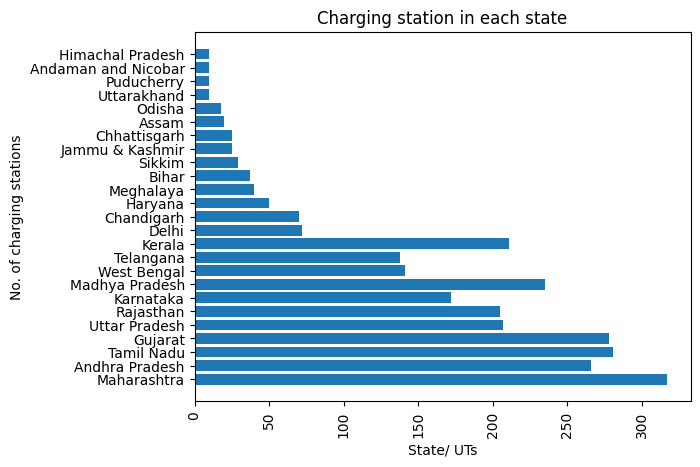

In [29]:
# fig = px.bar(charging_station, x='State/ UTs', y='No. of charging stations',title='Charging station in each state')
# fig.show(renderer="svg")

plt.barh(charging_station['State/ UTs'], charging_station['No. of charging stations'])
plt.xlabel('State/ UTs')
plt.ylabel('No. of charging stations')
plt.title('Charging station in each state')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [45]:
df_stations= pd.read_csv('Charging Station Data - Sheet1.csv')
df_stations.head()

,Name of State/ UT,Charging Stations,Sanctioned to States/ UTs,Total
0,Telangana,56.0,138.0,194
1,Jharkhand,29.0,NaN,29
2,Goa,26.0,NaN,26
3,Karnataka,48.0,172.0,220
4,Himachal Pradesh,9.0,10.0,19


In [46]:
df_stations.fillna(0,inplace=True)

In [47]:
df_station=df_stations.sort_values('Total',ascending=False)

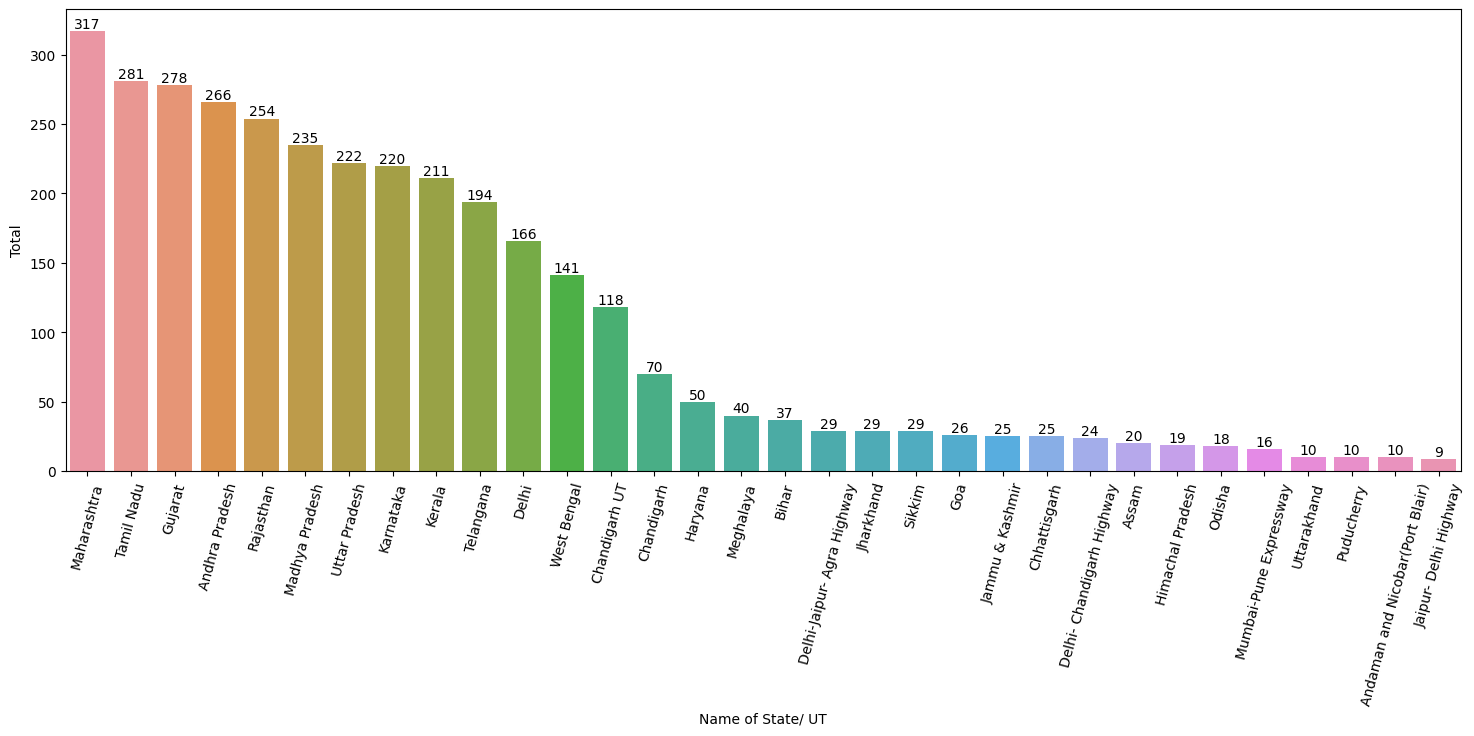

In [48]:
plt.figure(figsize=(18,6))
plt.xticks(rotation = 75)
ax=sns.barplot(x=df_station['Name of State/ UT'],y=df_station['Total'])
for i in ax.containers:
    ax.bar_label(i,)

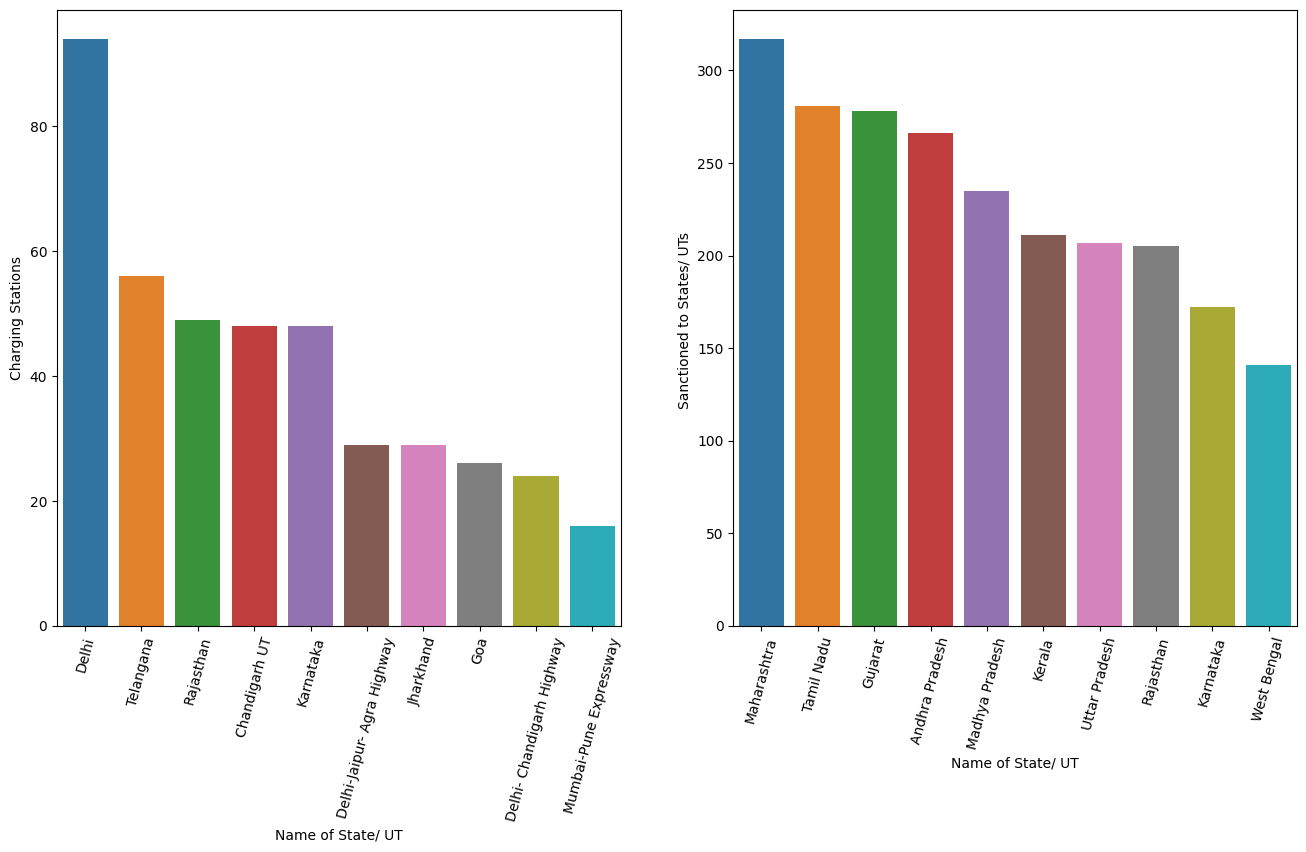

In [49]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.barplot(x=df_stations.sort_values('Charging Stations',ascending=False).head(10)['Name of State/ UT'],y=df_stations.sort_values('Charging Stations',ascending=False).head(10)['Charging Stations'])
plt.xticks(rotation = 75)

plt.subplot(1,2,2)
sns.barplot(x=df_stations.sort_values('Sanctioned to States/ UTs ',ascending=False).head(10)['Name of State/ UT'],y=df_stations.sort_values('Sanctioned to States/ UTs ',ascending=False).head(10)['Sanctioned to States/ UTs '])
plt.xticks(rotation = 75)
plt.show()

As evident from the data the sates of Maharashtra, Tamil Nadu, Gujrat , Andra Pradesh , Rajasthan , MP, UP and Karnataka can be good geographic segments to target EVs.

In [10]:
behaviroual_df = pd.read_csv("behaviroual_dataset.csv")
behaviroual_df.rename(columns={'Personal loan':'Loan'},inplace=True)
behaviroual_df.head(-5)

,Age,Profession,Marrital Status,Education,No of Dependents,Loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000
...,...,...,...,...,...,...,...,...
89,34,Business,Married,Post Graduate,3,Yes,1900000,700000
90,35,Salaried,Married,Graduate,2,No,1400000,800000
91,36,Salaried,Married,Post Graduate,3,Yes,4900000,1600000
92,37,Salaried,Married,Graduate,2,No,2800000,1200000


In [11]:
diffrent_profession = behaviroual_df['Marrital Status'].value_counts()
print(diffrent_profession)

Married    84
Single     15
Name: Marrital Status, dtype: int64


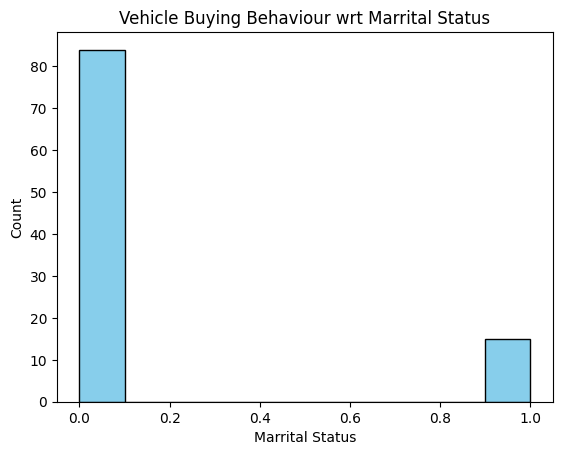

In [41]:
# fig = px.histogram(behaviroual_df, x="Marrital Status",color="Marrital Status",title='Vehicle Buying Behaviour wrt Marrital Status')
# fig.update_layout(bargap=0.2)
# fig.show(renderer='svg')
plt.hist(behaviroual_df["Marrital Status"], color="skyblue", edgecolor="black")
plt.xlabel("Marrital Status")
plt.ylabel("Count")
plt.title("Vehicle Buying Behaviour wrt Marrital Status")
plt.show()

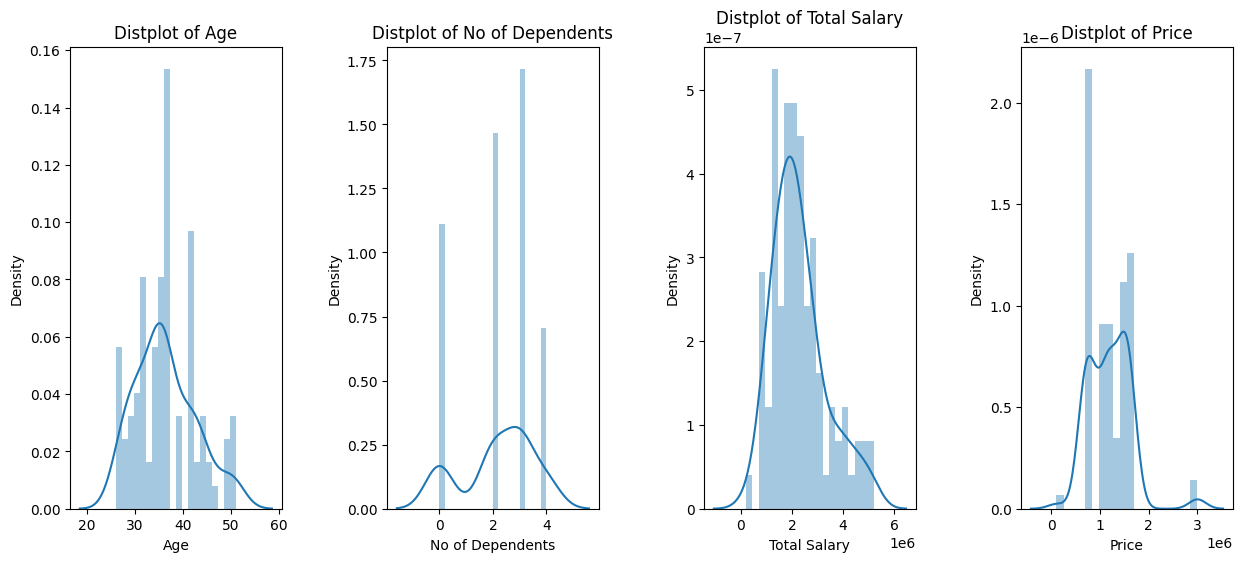

In [14]:
plt.figure(1, figsize=(15,6))
n=0
group_labels = ['Group 1', 'Group 2', 'Group 3','Group 4']
for x in ['Age', 'No of Dependents' ,'Total Salary'  ,'Price']:
  n += 1
  plt.subplot(1,4,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(behaviroual_df[x], bins= 20)
  plt.title('Distplot of {}'.format(x))
plt.show()

In [15]:
features = list(behaviroual_df.columns)
features

['Age',
 'Profession',
 'Marrital Status',
 'Education',
 'No of Dependents',
 'Loan',
 'Total Salary',
 'Price']

In [16]:
from sklearn.preprocessing import LabelEncoder

cols = ['Profession','Marrital Status','Education','Loan']
behaviroual_df[cols] = behaviroual_df[cols].apply(LabelEncoder().fit_transform)
behaviroual_df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Loan,Total Salary,Price
0,27,1,1,1,0,1,800000,800000
1,35,1,0,1,2,1,2000000,1000000
2,45,0,0,0,4,1,1800000,1200000
3,41,0,0,1,3,0,2200000,1200000
4,31,1,0,1,2,1,2600000,1600000


In [17]:
cluster_data = behaviroual_df[features]
from sklearn.cluster import KMeans
clustering_kmeans = KMeans(n_clusters=2)
cluster_data['clusters'] = clustering_kmeans.fit_predict(cluster_data)
cluster_data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Loan,Total Salary,Price,clusters
0,27,1,1,1,0,1,800000,800000,1
1,35,1,0,1,2,1,2000000,1000000,1
2,45,0,0,0,4,1,1800000,1200000,1
3,41,0,0,1,3,0,2200000,1200000,1
4,31,1,0,1,2,1,2600000,1600000,1


In [18]:
cluster_data['clusters'].value_counts()

1    72
0    27
Name: clusters, dtype: int64

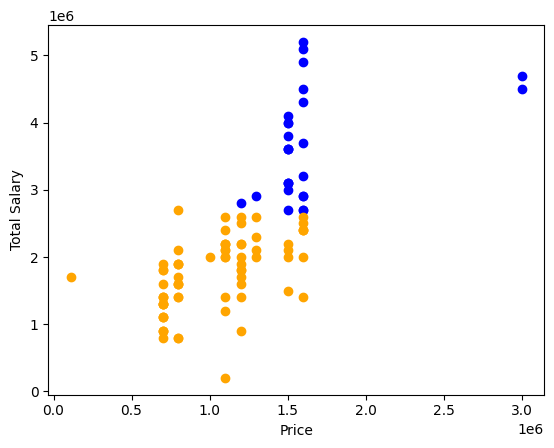

In [19]:
Cluster_0 = cluster_data[cluster_data.clusters==0]
Cluster_1 = cluster_data[cluster_data.clusters==1]

plt.scatter(Cluster_0.Price, Cluster_0['Total Salary'],color='blue')
plt.scatter(Cluster_1.Price, Cluster_1['Total Salary'],color='orange')

plt.xlabel('Price')
plt.ylabel('Total Salary')
plt.show()

In [20]:
from sklearn.preprocessing import MinMaxScaler

x = cluster_data['Age'].values.reshape(-1, 1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
cluster_data['Age']= x_scaled

x = cluster_data['Total Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
cluster_data['Total Salary']= x_scaled

x = cluster_data['Price'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
cluster_data['Price']= x_scaled

In [21]:
cluster_data['clusters'] = clustering_kmeans.fit_predict(cluster_data) 
cluster_data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Loan,Total Salary,Price,clusters
0,0.04,1,1,1,0,1,0.12,0.238754,0
1,0.36,1,0,1,2,1,0.36,0.307958,1
2,0.76,0,0,0,4,1,0.32,0.377163,1
3,0.60,0,0,1,3,0,0.40,0.377163,1
4,0.20,1,0,1,2,1,0.48,0.515571,1


In [22]:
clustering_kmeans = KMeans(n_clusters=3)
cluster_data['clusters'] = clustering_kmeans.fit_predict(cluster_data) 
cluster_data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Loan,Total Salary,Price,clusters
0,0.04,1,1,1,0,1,0.12,0.238754,1
1,0.36,1,0,1,2,1,0.36,0.307958,2
2,0.76,0,0,0,4,1,0.32,0.377163,0
3,0.60,0,0,1,3,0,0.40,0.377163,0
4,0.20,1,0,1,2,1,0.48,0.515571,2


In [23]:
cluster_data['clusters'].value_counts()

0    48
2    29
1    22
Name: clusters, dtype: int64

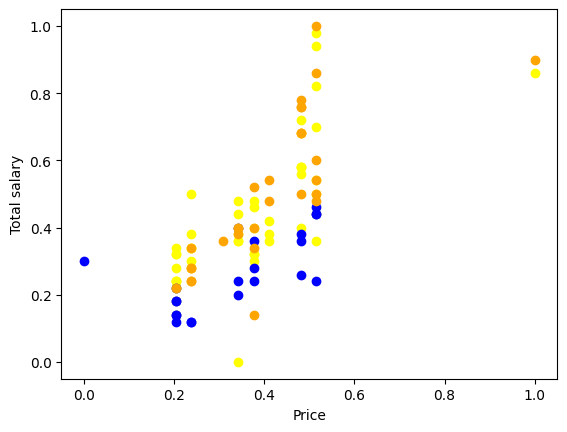

In [24]:
Cluster_0 = cluster_data[cluster_data.clusters==0]
Cluster_1 = cluster_data[cluster_data.clusters==1]
Cluster_2 = cluster_data[cluster_data.clusters==2]
plt.scatter(Cluster_0.Price, Cluster_0['Total Salary'],color='yellow')
plt.scatter(Cluster_1.Price, Cluster_1['Total Salary'],color='blue')
plt.scatter(Cluster_2.Price, Cluster_2['Total Salary'],color='orange')

plt.xlabel('Price')
plt.ylabel('Total salary')
plt.show()

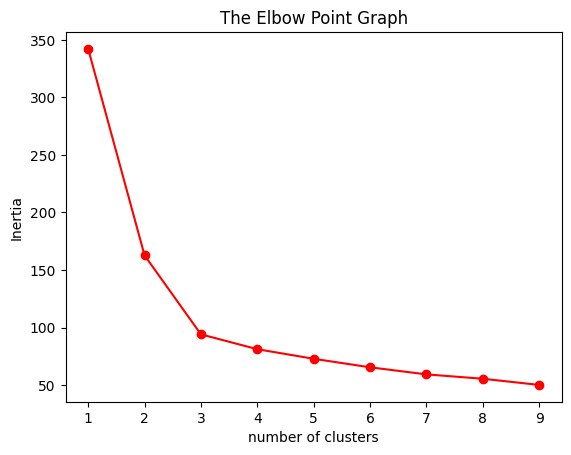

In [25]:
from sklearn.cluster import KMeans
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(cluster_data)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='red')
plt.title('The Elbow Point Graph')
plt.xlabel('number of clusters')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [26]:
clustering_kmeans = KMeans(n_clusters = 6)
cluster_data['clusters'] = clustering_kmeans.fit_predict(cluster_data) 
cluster_data

,Age,Profession,Marrital Status,Education,No of Dependents,Loan,Total Salary,Price,clusters
0,0.04,1,1,1,0,1,0.12,0.238754,2
1,0.36,1,0,1,2,1,0.36,0.307958,3
2,0.76,0,0,0,4,1,0.32,0.377163,4
3,0.60,0,0,1,3,0,0.40,0.377163,5
4,0.20,1,0,1,2,1,0.48,0.515571,3
...,...,...,...,...,...,...,...,...,...
94,0.04,0,1,0,0,0,0.44,0.515571,2
95,0.96,1,0,1,3,0,0.98,0.515571,1
96,1.00,0,0,0,2,1,0.40,0.342561,0
97,1.00,1,0,1,2,0,0.76,0.480969,3


In [27]:
labels = clustering_kmeans.labels_
labels

array([2, 3, 4, 5, 3, 4, 4, 5, 5, 4, 1, 4, 2, 3, 4, 1, 2, 2, 3, 2, 1, 5,
       5, 5, 4, 0, 1, 5, 1, 3, 5, 4, 1, 5, 4, 1, 2, 2, 2, 2, 5, 2, 2, 1,
       3, 4, 5, 0, 3, 4, 5, 1, 1, 5, 0, 1, 4, 2, 2, 2, 2, 2, 2, 1, 0, 5,
       0, 3, 3, 5, 3, 3, 0, 2, 2, 3, 3, 5, 1, 3, 4, 0, 1, 3, 4, 5, 2, 3,
       0, 5, 0, 1, 0, 2, 2, 1, 0, 3, 3])

<h1>Psychographic segments</h1><br><h4>-Lifestyle</h4>
    Target Married Marital Status
    <br>
<h1>Geographic segments</h1>
<h4>-Location</h4>
Pune, Mumbai, New Delhi, Bengaluru Considering based on Segmentation Analysis and the Infrastructres sanctioned by Govt.